<a href="https://colab.research.google.com/github/Dansah2/Free_Code_Camp_Tutorials/blob/main/01_Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch Workflow

In [ ]:
import torch
from torch import nn #contains everything for building neural nets
import matplotlib.pyplot as plt
import numpy as np


#torch.__version__

In [ ]:
# Data Loading and Preparing
# this can be almost anything
# excel, images, videos, audio, DNA, Text

# machine learning is a game of two parts,
# 1) get data in to a numerical representation
# 2) build a model to learn patterns  in that numerical representation

In [ ]:
# lets create known data using linear regression formula

# create known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X * bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.0000],
         [0.0042],
         [0.0084],
         [0.0126],
         [0.0168],
         [0.0210],
         [0.0252],
         [0.0294],
         [0.0336],
         [0.0378]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
# Splitting data in train and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
# visualize the data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')
  # plot testing data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing Data')
  # are there predictions?
  if predictions is not None:
    # plot predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  #show legend
  plt.legend(prop={'size':14});

  plt.show()


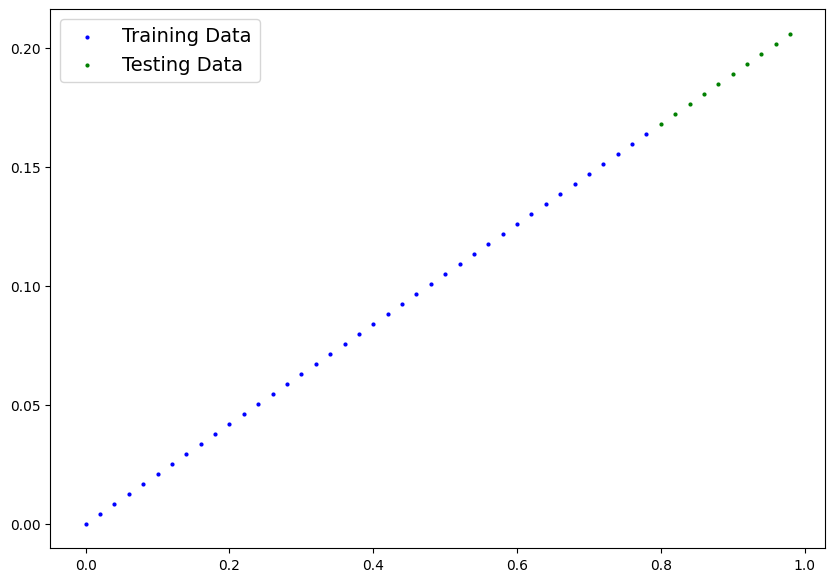

In [ ]:
plot_predictions()

In [ ]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

  # forward method to define the computation in the model

  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias # this is the linear regression formula


In [ ]:
### PyTorch model building essentials
# torch.nn - contains all the building blocks for a computational graph
# torch.nn.Parameter - what parameters should our model try to learn
# torch.nn.Module - the base class for neural nets, if you subclass it you should overwrite forward method
# torch.optim - this is where the optimizers live; they help with gradient descent
# def forward() - all nn.Module subclasses require you to overwirite forward()

In [ ]:
# checking the contents of the model

# check the parameters of the model, start with a random seed
torch.manual_seed(42)

# create an instance of the model
model_0 = LinearRegressionModel()

# now check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# making predictions using torch.inference_mode()
# inference mode disables all things needed for training
with torch.inference_mode():
  y_preds = model_0(X_test)

print(y_preds)
print(len(X_test))
print(len(y_preds))

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])
10
10


In [ ]:
y_test

tensor([[0.1680],
        [0.1722],
        [0.1764],
        [0.1806],
        [0.1848],
        [0.1890],
        [0.1932],
        [0.1974],
        [0.2016],
        [0.2058]])

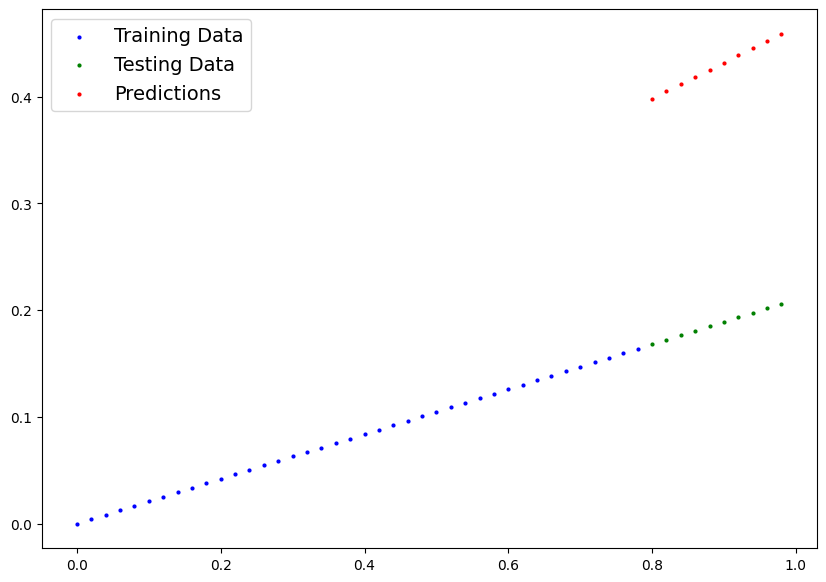

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[-0.2302],
        [-0.2327],
        [-0.2352],
        [-0.2378],
        [-0.2403],
        [-0.2428],
        [-0.2454],
        [-0.2479],
        [-0.2504],
        [-0.2530]])

In [ ]:
# train the model
# to measure how wrong the predictions are use a loss function
# loss function may be called cost function or criterion in other cases
# for pytorch we need a training loop and testing loop

In [ ]:
# set up loss function
loss_fn = nn.L1Loss()

# set up optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
#building both a training and testing loop
# loop through the data
# forward pass or forward propagation(data moves through the foward functions
# calculate the loss (compare predictions to truth labels)
# Optimizer zero grad
# Loss backward or back propagation (data moves backward through the network to calculate gradients of each parameters with respect to loss)
# Optimizer step - use the optimizer to adjust model's parameters to improve the loss

In [ ]:
#set manual seed
torch.manual_seed(42)

# An epoch is one loop through the data, this is a hyperparameter because we set them ourselves
epochs = 60

# track different values
epoch_count = []
loss_values = []
test_loss_value = []

### Training
# loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train() # sets all parameters that require gradients to requre gradients

  # forward pass
  y_pred = model_0(X_train)

  #calculate the loss
  loss = loss_fn(y_pred, y_train)

  #optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  #step the optimizer, this zeros out the optimizer
  optimizer.step()

  # Testing (turns off gradient tracking)
  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_pred = model_0(X_test)

    #calculate loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_value.append(test_loss)
    #prints out what is happening
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    #print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.17821863293647766 | Test loss: 0.22809283435344696
OrderedDict([('weights', tensor([0.3328])), ('bias', tensor([0.1188]))])
Epoch: 10 | Loss: 0.06300870329141617 | Test loss: 0.09338293969631195
OrderedDict([('weights', tensor([0.2938])), ('bias', tensor([0.0188]))])
Epoch: 20 | Loss: 0.01129001285880804 | Test loss: 0.025797033682465553
OrderedDict([('weights', tensor([0.2645])), ('bias', tensor([-0.0227]))])
Epoch: 30 | Loss: 0.007851206697523594 | Test loss: 0.0175245963037014
OrderedDict([('weights', tensor([0.2473])), ('bias', tensor([-0.0157]))])
Epoch: 40 | Loss: 0.0044124070554971695 | Test loss: 0.009252198040485382
OrderedDict([('weights', tensor([0.2302])), ('bias', tensor([-0.0087]))])
Epoch: 50 | Loss: 0.009151091799139977 | Test loss: 0.0006053060060366988
OrderedDict([('weights', tensor([0.2160])), ('bias', tensor([-0.0047]))])


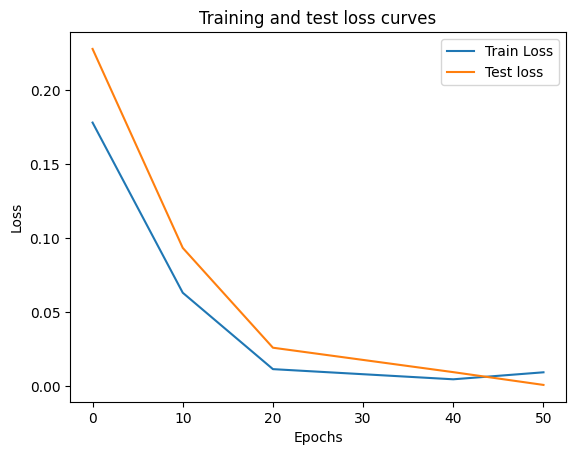

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_value, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)


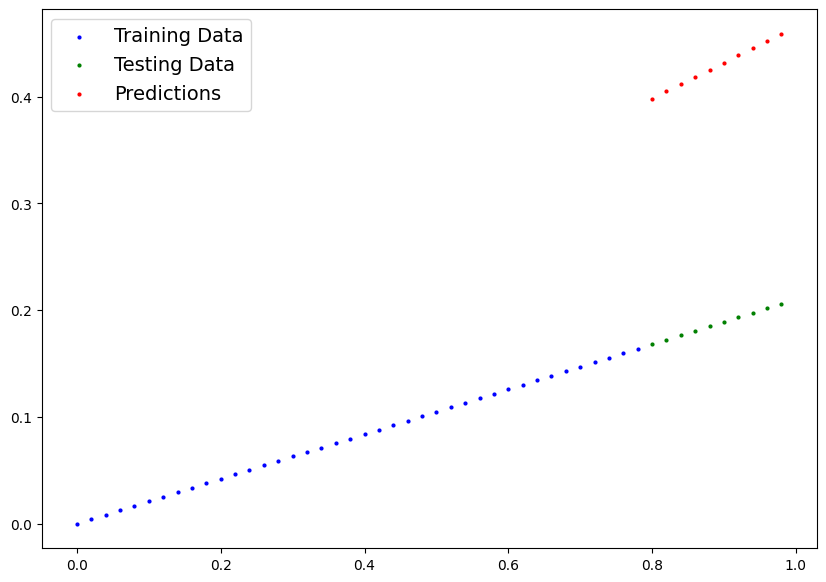

In [ ]:
# old predictions
plot_predictions(predictions=y_preds)

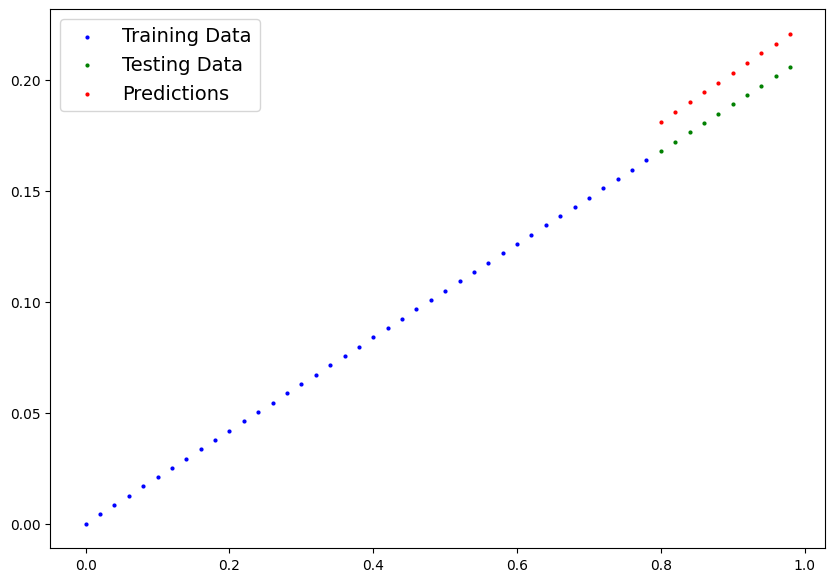

In [ ]:
# new predictions after training
plot_predictions(predictions=y_preds_new)

In [ ]:
## Saving/Loading a model in Pytorch
# three methods

# 1) torch.save() - can save in python pickle format
# 2) torch.load() - save python object
# 3) torch.nn.Module.load_state_dict() - load model's saved state dictionary

In [ ]:
# Create the path where the model will be saved

from pathlib import Path
# create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

In [ ]:
# save the state_dict of the model
print(f'Saveing the model to {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saveing the model to models/01_pytorch_workflow_model_0.pth


In [ ]:
# check to see if the state_dict of model was saved
!ls -1 models

01_pytorch_workflow_model_0.pth


In [ ]:
## Loading a pytorch model
# we must instantiate a new instance of our model class

In [ ]:
# reminder of what we saved
model_0.state_dict()

OrderedDict([('weights', tensor([0.2199])), ('bias', tensor([0.0053]))])

In [ ]:
#instantiate new instance of the model
loaded_model_0 = LinearRegressionModel()

#load saved state_dict
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
#check to make sure the values match what we saved
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.2199])), ('bias', tensor([0.0053]))])

In [ ]:
from numpy.lib.npyio import load
# make some predicitons with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.1812],
        [0.1856],
        [0.1900],
        [0.1944],
        [0.1988],
        [0.2032],
        [0.2076],
        [0.2120],
        [0.2164],
        [0.2208]])

In [ ]:
# make predictions with the original model
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.1812],
        [0.1856],
        [0.1900],
        [0.1944],
        [0.1988],
        [0.2032],
        [0.2076],
        [0.2120],
        [0.2164],
        [0.2208]])

In [ ]:
# compare the loaded model to the initial model
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together


In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#check version
torch.__version__

'2.0.0+cu118'

Create Device Agnostic code

 if GPU is available, we will use it, else use CPU

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"using device {device}")

using device cuda


Create data using linear regression formula

In [ ]:
weight = 0.7
bias = 0.3

# create range of values
start = 0
end = 1
step = 0.02

# create x and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze you will get errors
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# split data
train_split2 = int(0.8 * len(X))
X_train2, y_train2 = X[:train_split2], y[:train_split2]
X_test2, y_test2 = X[train_split2:], y[train_split2:]

#check the length of each training and testing set
len(X_train2), len(y_train2), len(X_test2), len(y_test2)

(40, 40, 10, 10)

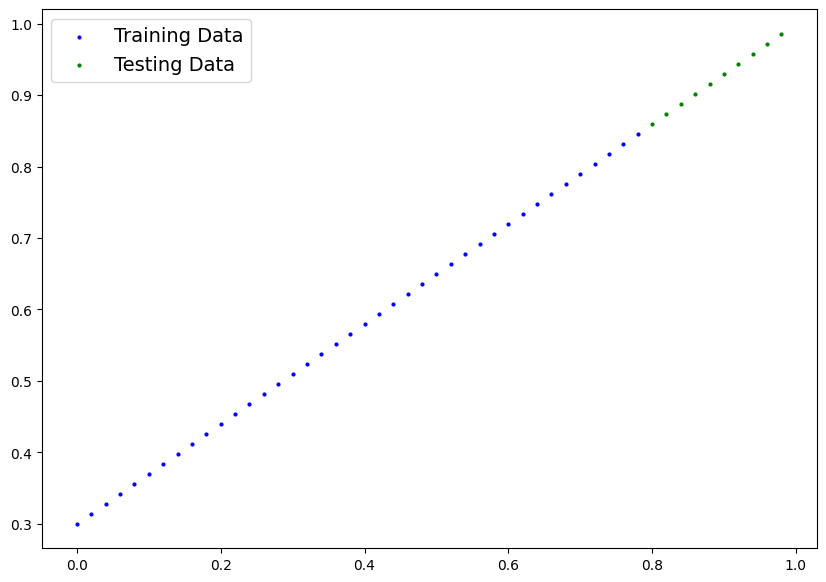

In [ ]:
# plot the data

plot_predictions(X_train2, y_train2, X_test2, y_test2)

In [ ]:
# create a pytorch linear model with subclass nn.model

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# check the current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# set model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training

loss function
Optimizer
Training loop
Testing loop

In [ ]:
# loss function use L1 for this example
loss_fn = nn.L1Loss()

#set up optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
### training loop

# set manuel seed
torch.manual_seed(42)

epochs = 200

# put data on the target device (device agnostic code)
X_train2 = X_train2.to(device)
y_train2 = y_train2.to(device)
X_test2 = X_test2.to(device)
y_test2 = y_test2.to(device)

for epoch in range(epochs):
  model_1.train()

  #forward pass
  y_pred = model_1(X_train2)

  #calculate loss
  loss = loss_fn(y_pred, y_train2)

  # optimizer zero grad
  optimizer.zero_grad()

  # perform backpropagation
  loss.backward()

  # optimizer step
  optimizer.step()

  ### Testing

  #put in evaluation mode
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test2)

    test_loss = loss_fn(test_pred, y_test2)

  # print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss: {loss}, Test loss: {test_loss}")

Epoch: 0, Loss: 0.5551779866218567, Test loss: 0.5739762187004089
Epoch: 10, Loss: 0.439968079328537, Test loss: 0.4392664134502411
Epoch: 20, Loss: 0.3247582018375397, Test loss: 0.30455657839775085
Epoch: 30, Loss: 0.20954833924770355, Test loss: 0.16984669864177704
Epoch: 40, Loss: 0.09433845430612564, Test loss: 0.03513690456748009
Epoch: 50, Loss: 0.023886388167738914, Test loss: 0.04784907028079033
Epoch: 60, Loss: 0.019956795498728752, Test loss: 0.045803118497133255
Epoch: 70, Loss: 0.016517987474799156, Test loss: 0.037530567497015
Epoch: 80, Loss: 0.013089174404740334, Test loss: 0.02994490973651409
Epoch: 90, Loss: 0.009653178043663502, Test loss: 0.02167237363755703
Epoch: 100, Loss: 0.006215683650225401, Test loss: 0.014086711220443249
Epoch: 110, Loss: 0.00278724217787385, Test loss: 0.005814164876937866
Epoch: 120, Loss: 0.0012645035749301314, Test loss: 0.013801801018416882
Epoch: 130, Loss: 0.0012645035749301314, Test loss: 0.013801801018416882
Epoch: 140, Loss: 0.0012

In [ ]:
# evaluate model
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# check the weight and bias to see how close the model was
weight, bias

(0.7, 0.3)

In [ ]:
## Making and evaluation predictions

#put model in evaluation mode
model_1.eval()

# make predicitons
with torch.inference_mode():
  y_preds = model_1(X_test2)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

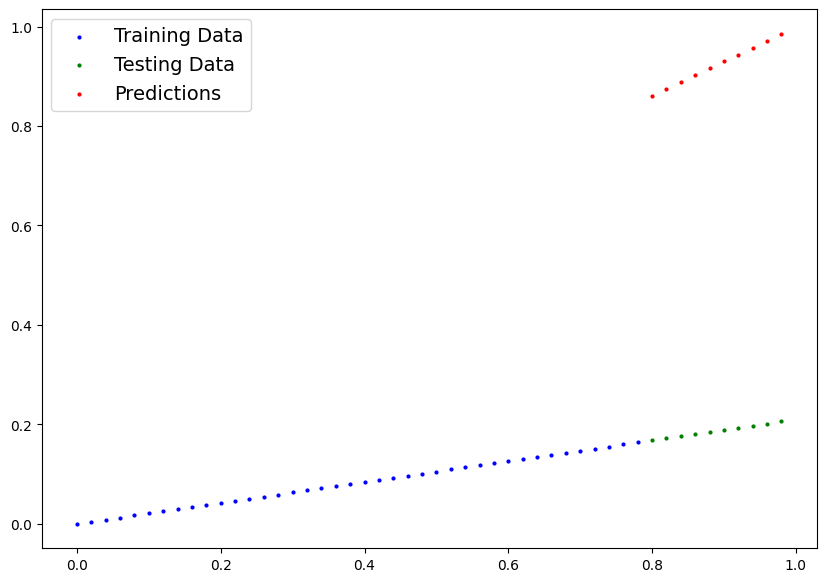

In [ ]:
# plot model predicitions
plot_predictions(predictions=y_preds.cpu())

In [ ]:
### Saving & Loading a trained model
from pathlib import Path

# create model's directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model path
MODEL_NAME = '01_pytorch_workflow_model1_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# safe model state dict
print(f'saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow_model1_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Load a Pytorch model

# create new instance
loaded_model_1 = LinearRegressionModelV2()

#load saved state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put the loaded model onto the device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# check if parameters are on the right device
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# evaluated loaded model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test2)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')